In [ ]:
from common.util import im2col
import sys, os
import numpy as np

class Pooling:
    def __init__(self,pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
    
    def forward(self,x):
        N,C,H,W = x.shape
        out_h = int((1+(H-self.pool_h)) / self.stride)
        out_w = int((1+(W-self.pool_w)) / self.stride)
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h * self.pool_w)
        
        out= np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        return out
        

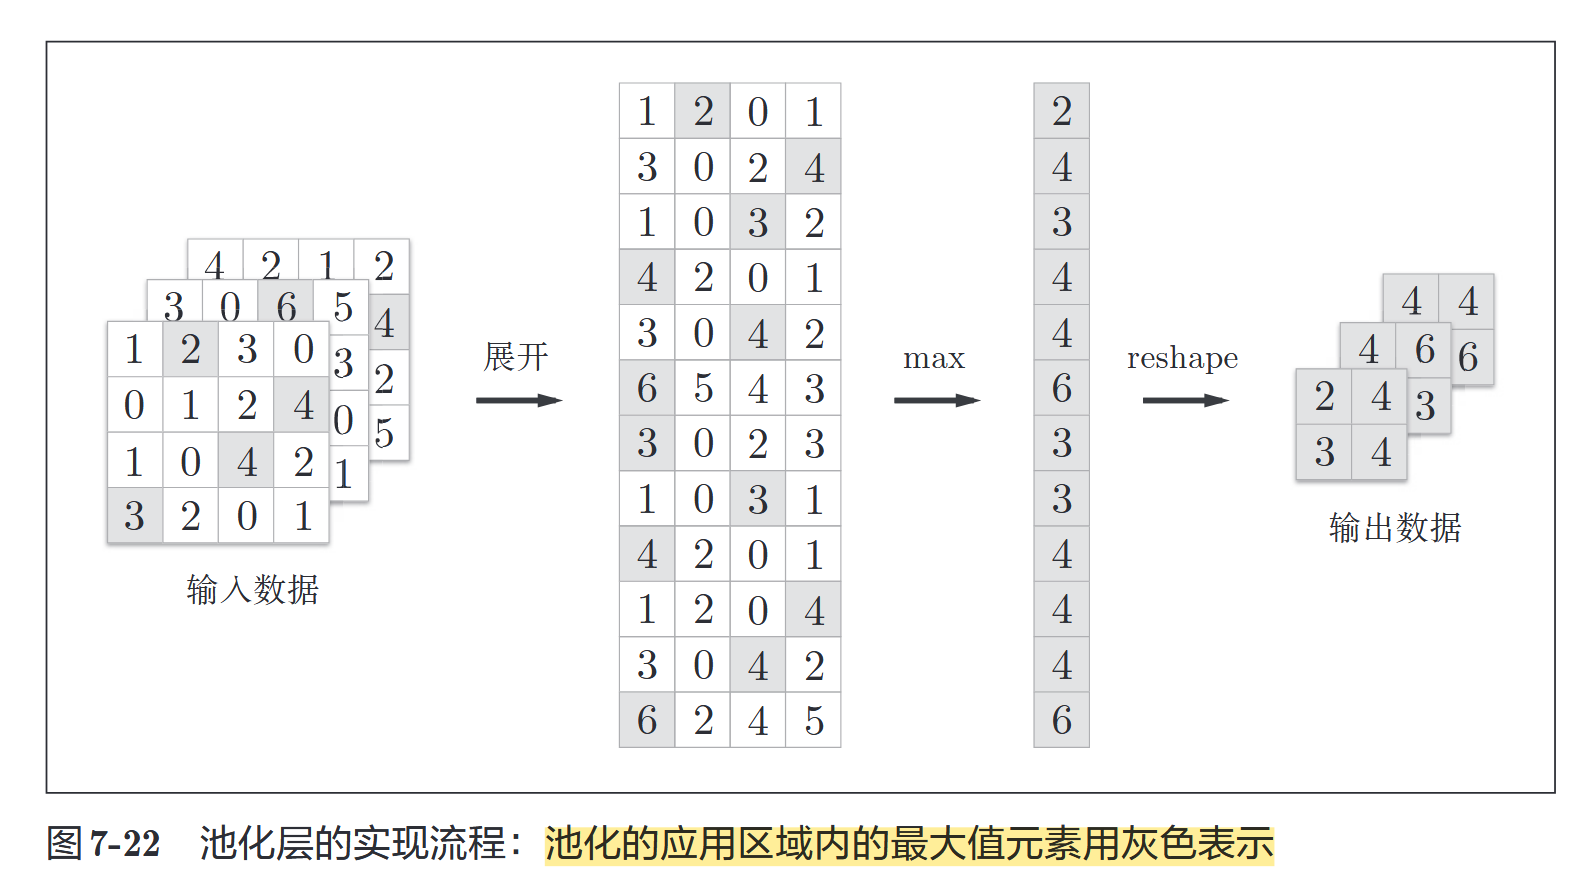